In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
plt.style.use("dark_background")

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['age', 'fare']],
    df['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [3]:
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

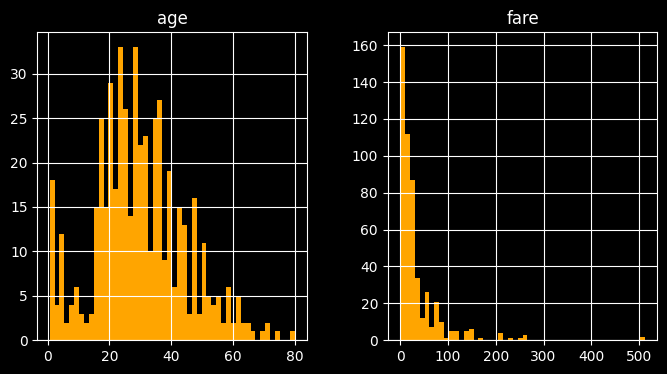

In [4]:
X_train.hist(bins=50,color='orange',figsize=(8,4))

In [6]:
disc = KBinsDiscretizer(n_bins=5,encode="ordinal",strategy="kmeans").set_output(transform="pandas")

disc.fit(X_train)

KBinsDiscretizer(encode='ordinal', strategy='kmeans')

In [7]:
disc.bin_edges_

array([array([ 0.67      , 13.13916584, 27.22431471, 39.28858025, 53.28431373,
              80.        ])                                                   ,
       array([  0.        ,  40.79932779,  98.2663    , 182.6085697 ,
              373.36228333, 512.3292    ])                           ],
      dtype=object)

<Axes: xlabel='age'>

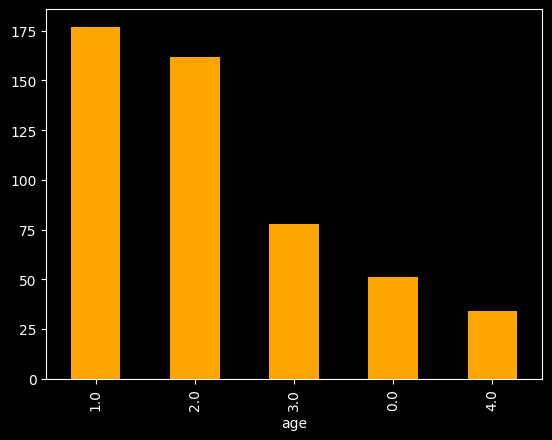

In [8]:
train_t = disc.transform(X_train)
train_t.age.value_counts().plot.bar(color = "orange")

<Axes: xlabel='fare'>

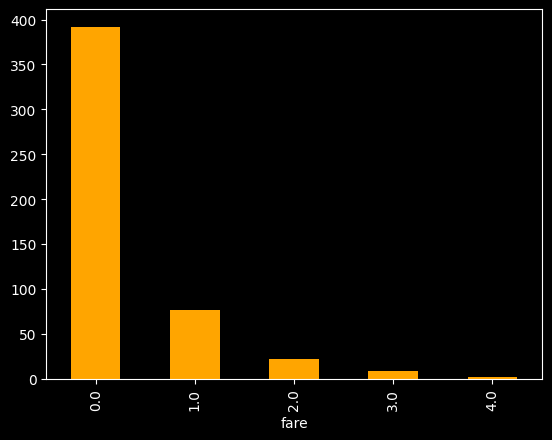

In [9]:
train_t.fare.value_counts().plot.bar(color = "orange")

<Axes: xlabel='age'>

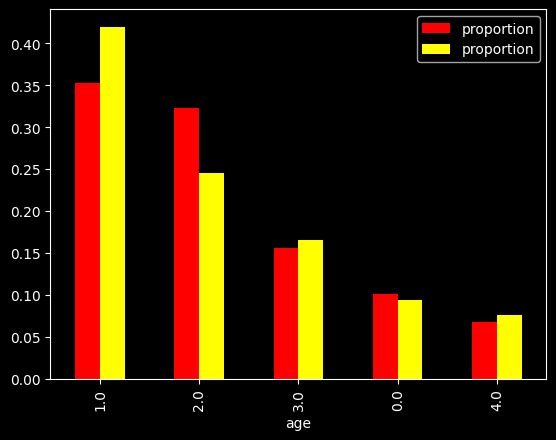

In [11]:
test_t = disc.transform(X_test)

t1 = train_t.age.value_counts(normalize=True)
t2 = test_t.age.value_counts(normalize=True)

tmp = pd.concat([t1,t2],axis=1)
tmp.plot.bar(color=["red","yellow"])

<Axes: xlabel='fare'>

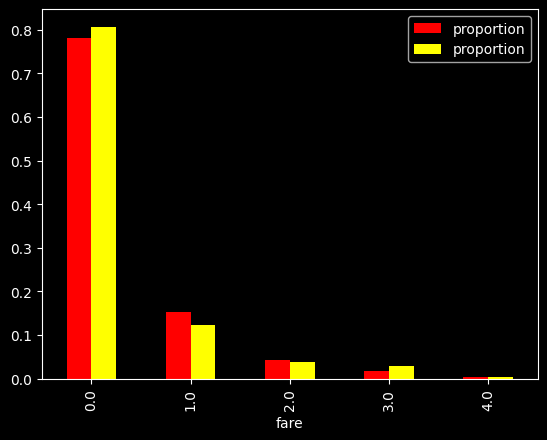

In [12]:
t1 = train_t.fare.value_counts(normalize=True)
t2 = test_t.fare.value_counts(normalize=True)

tmp = pd.concat([t1,t2],axis=1)
tmp.plot.bar(color=["red","yellow"])